In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import math

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [9]:
data=pd.read_csv('C:/Users/Kalpana/Desktop/BIG DATA PROJECT/TWITTER/FINAL/onemill.csv', encoding='latin', names = ['target', 'id', 'date', 'flag', 'user', 'tweet'])
data

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
data.shape

(1600000, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
target    1600000 non-null int64
id        1600000 non-null int64
date      1600000 non-null object
flag      1600000 non-null object
user      1600000 non-null object
tweet     1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


No handles with labels found to put in legend.


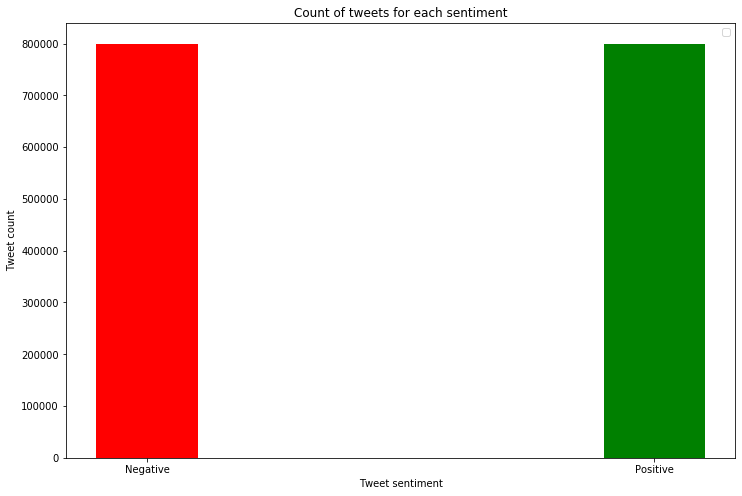

In [13]:
class_count = data['target'].value_counts() # Returned in descending order [4, 0]
plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

In [15]:
data['month'] = data['date'].apply(lambda date: date.split(' ')[1])
months_count = data['month'].value_counts()

Text(0.5, 1.0, 'Tweets during months of 2009')

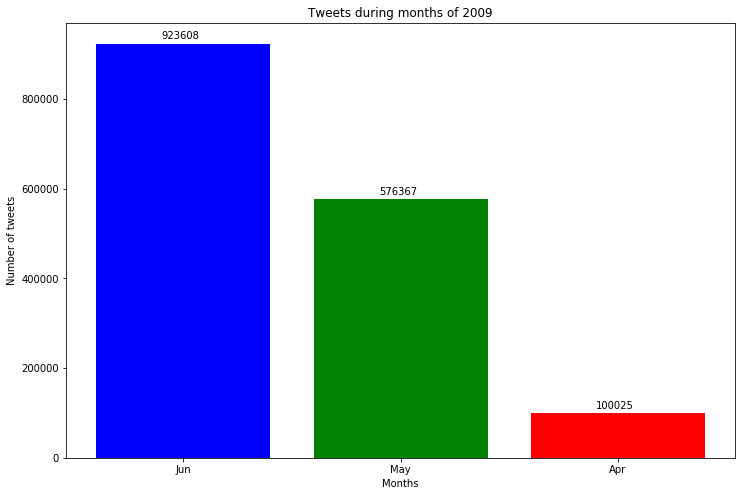

In [16]:
plt.figure(figsize = (12, 8))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2009')

In [17]:
grp=data.groupby('target')
grp

In [ ]:
for target,target_df in grp:
    print(target)
    print(target_df)

In [18]:
data["total_tweet"]=data["user"].map(data["user"].value_counts())
data

,target,id,date,flag,user,tweet,month,total_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Apr,2
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Apr,9
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Apr,8
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Apr,12
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Apr,50
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Jun,1
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Jun,4
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Jun,1
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Jun,15


In [21]:
data["date"]=pd.to_datetime(data["date"])
Tdays=math.ceil((data.iloc[data.shape[0]-1]["date"]-data.iloc[0]["date"]) / np.timedelta64(1,'D'))
Tdays

71

In [22]:
data["tweets_per_day"]=data["total_tweet"]/Tdays
data

,target,id,date,flag,user,tweet,month,total_tweet,tweets_per_day
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Apr,2,0.028169
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Apr,9,0.126761
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Apr,8,0.112676
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Apr,12,0.169014
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Apr,50,0.704225
...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Jun,1,0.014085
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Jun,4,0.056338
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Jun,1,0.014085
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Jun,15,0.211268


In [23]:
Activecondition=[
    (data["tweets_per_day"]<=0.1),
    (data["tweets_per_day"]>0.1) & (data["tweets_per_day"]<=0.7),
    (data["tweets_per_day"]>0.7) & (data["tweets_per_day"]<=2),
    (data["tweets_per_day"]>2) & (data["tweets_per_day"]<=5),
    (data["tweets_per_day"]>5)
]
Activity=["very less active","less active","moderately active","highly active","extremely active"]
data["Activity Level"]=np.select(Activecondition,Activity)
data

,target,id,date,flag,user,tweet,month,total_tweet,tweets_per_day,Activity Level
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Apr,2,0.028169,very less active
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Apr,9,0.126761,less active
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Apr,8,0.112676,less active
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Apr,12,0.169014,less active
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Apr,50,0.704225,moderately active
...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Jun,1,0.014085,very less active
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Jun,4,0.056338,very less active
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Jun,1,0.014085,very less active
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Jun,15,0.211268,less active


In [24]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet) 

In [25]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
data['retweeted'] = data.tweet.apply(find_retweeted)
data['mentioned'] = data.tweet.apply(find_mentioned)
data['hashtags'] = data.tweet.apply(find_hashtags)
data

NameError: name 're' is not defined

In [18]:
data.to_csv('new_dataset.csv')